# Start

# Fidelity calculator check

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use
# from lib_SSResult import Histogram

filename2 = '193544_SingleShot.dat'
paramfile2 = '193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)

data loaded
new center of blobs:  -0.0133475321638   0.0133475321638
data was normalised and saved
threshold set
x-data shifted. threshold=0
postselection done
x_g, x_e histograms was made
new center setted: -0.0160424063797   0.0130018088417
x_g_pre histogram was made
x_e_pre histogram was made
x_g_sel histogram was made
x_e_sel histogram was made
new center selected setted: -0.0160634123989   0.0129898565095
Object is created


0.0130018088417
0.0129898565095
regime: raw_data
regime: selected


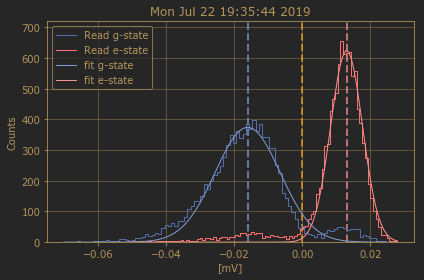

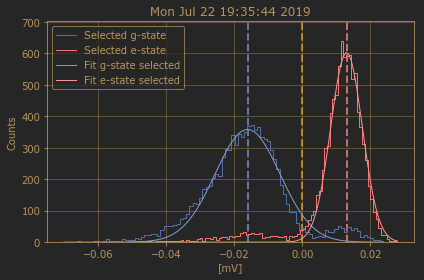

In [6]:
print m2.center_x_e
print m2.center_x_e_select
pic = m2.plot_hists(log=False)
pic2 = m2.plot_hists(log=False,regime='selected')

In [7]:
m2.calculate_fidelity_post()
m2.dict_fidelity

{'Err_e': 0,
 'Err_g': 0,
 'F': 0.923,
 'F_e': 0.9252,
 'F_g': 0.9208,
 'F_gaus': 0,
 'F_gaus_eg': 0,
 'F_gaus_ge': 0,
 'F_post': 0.9232837812674906,
 'F_post_e': 0.9255341215515454,
 'F_post_g': 0.9210334409834358}

# To check, if it is better threshold for postselected data

### new threshold made on selected data

In [8]:
threshold_vec = np.linspace(-0.02, 0.02, 1000)
fid_vec = []
for th in threshold_vec:
    f = m2.get_fro_vs_threshold(m2.x_g_select, m2.x_e_select, th)
    fid_vec.append(f)
fid_max = np.max(fid_vec)
thr_opt = threshold_vec[ np.argmax(fid_vec) ]

print 'fidelity: ', fid_max
print 'threshold: ', thr_opt

print 'before this operation:'
print 'fidelity was: ', m2.dict_fidelity['F_post']
print 'threshold was: ', m2.threshold


fidelity:  0.923690734828
threshold:  0.000780780780781
before this operation:
fidelity was:  0.923283781267
threshold was:  0


### new threshold on same data. Maybe we just can be more precise?

In [5]:
threshold_vec = np.linspace(-0.02, 0.02, 10000)
fid_vec = []
for th in threshold_vec:
    f = m2.get_fro_vs_threshold(m2.x_g, m2.x_e, th)
    fid_vec.append(f)
fid_max = np.max(fid_vec)
thr_opt = threshold_vec[ np.argmax(fid_vec) ]

print 'fidelity: ', fid_max
print 'threshold: ', thr_opt

print 'before this operation:'
print 'fidelity was: ', m2.dict_fidelity['F_post']
print 'threshold was: ', m2.threshold


fidelity:  0.92315
threshold:  0.000766076607661
before this operation:
fidelity was:  0.923283781267
threshold was:  0


# WORK ON GAUSS OVERLAP

In [ ]:
import scipy as sci

In [55]:
def gaussian(x, a=1, b=1, c=1):
    y = a * np.exp( -(x-b)**2 /(2*c**2) )
    return y

In [135]:
def errfunc(x, x_c=0, sig=1.0):
    '''
    modification for standard error-function from scipy
    to integrate gaussian form -infinity to x
    And also to take into account sigma and x_center
    '''
    y = sci.special.erf( (x - x_c)/sig )
    y = 0.5 + 0.5*y
    return y

In [182]:
#############################3

# Work with errorfunction. Done!

In [179]:
# max_point = 1.2
x_center = 0
sigma = 0.5
# for normal probability distribution
max_point = 1 / (sigma *np.sqrt(2*np.pi) )
print max_point

0.797884560803


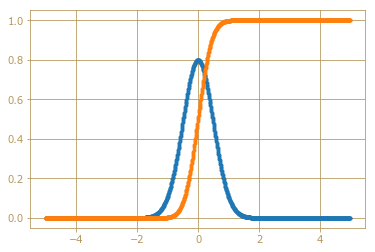

In [180]:
x_list = np.arange(-5,5,0.01)
y_list = []
for x in x_list:
    y_list.append(gaussian(x, a=max_point, b=x_center, c=sigma))
    
    
### modification
x_list1 = np.arange(-5,5,0.01)
y_list1 = []
for x1 in x_list1:
    y_list1.append( errfunc(x1, x_c=x_center, sig=sigma) )
    
plt.figure()
plt.plot( x_list, y_list, '.' )
plt.plot( x_list1, y_list1, '.' )
plt.show()

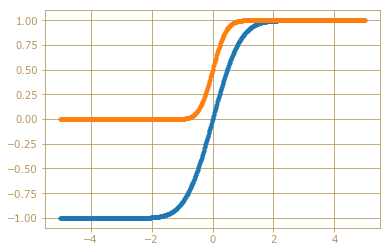

In [132]:
## standard
x_list = np.arange(-5,5,0.01)
y_list = []
for x in x_list:
    y_list.append( sci.special.erf(x) )

### modification
x_list1 = np.arange(-5,5,0.01)
y_list1 = []
for x1 in x_list1:
    y_list1.append( errfunc(x1, x_c=x_center, sig=sigma) )
    
    

plt.figure()
plt.plot( x_list, y_list, '.' )
plt.plot( x_list1, y_list1, '.' )
plt.show()

# To understand which sigma is what

In [194]:
[x_center_g, sigma_g, sigma_hwhh_g, max_y_g, min_y_g] = m2.hist_x_g.gauss_param


In [195]:
print g_sigma
print sigma_wtf
print g_sigma/sigma_wtf

0.00954329611833
0.0190865922367
0.5


In [197]:
max_y_g

8.9498243044587564

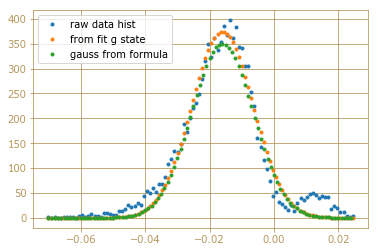

In [192]:
## plot gaussian from fit

#fit itself
x1 = m2.hist_x_g.gauss_fit[1]
y1 = m2.hist_x_g.gauss_fit[0]

x0 = m2.hist_x_g.hist_xy[1]
y0 = m2.hist_x_g.hist_xy[0]

#check the fit parameters
limits = [ np.min(m2.hist_x_g.hist_xy[1]), np.max(m2.hist_x_g.hist_xy[1]) ]
[x_center_g, sigma_g, sigma_hwhh_g, max_y_g, min_y_g] = m2.hist_x_g.gauss_param

x_list = np.arange(limits[0],limits[1],0.001)
y_list = []
for x in x_list:
    y_list.append(gaussian(x, a=350, b=g_center, c=g_sigma))
    
plt.figure()
plt.plot( x0,y0,'.', label='raw data hist')
plt.plot( x1,y1,'.', label='from fit g state')
plt.plot( x_list,y_list,'.', label='gauss from formula')
plt.legend()
plt.show()

# What we need is sigma = fit_parameters[1]

In [266]:
def overlap_error(threshold=0, left_or_righ='left', x_center=0, sigma=1):
    '''
    function to calculate an overlap error for one gaussian for given threshold
    '''
    if left_or_righ=='left':
        error = 1.0 - errfunc(threshold, x_c=x_center, sig=sigma)
    elif left_or_righ=='right':
        error = errfunc(threshold, x_c=x_center, sig=sigma)
    else:
        return None
        
    return error

In [273]:
threshold = m2.threshold

In [274]:
[x_center_g, sigma_g] = [ m2.hist_x_g.gauss_param[0], m2.hist_x_g.gauss_param[1] ]
err_overlap_g = overlap_error(threshold, left_or_righ='left', x_center=x_center_g, sigma=sigma_g)

In [275]:
[x_center_e, sigma_e] = [ m2.hist_x_e.gauss_param[0], m2.hist_x_e.gauss_param[1] ]
err_overlap_e = overlap_error(threshold, left_or_righ='right', x_center=x_center_e, sigma=sigma_e)

In [276]:
fid_overlap_g = 1.0 - err_overlap_g
fid_overlap_e = 1.0 - err_overlap_e
fid_overlap_total = 1.0 - 0.5*( err_overlap_g + err_overlap_e )

In [277]:
print 'fid_overlap_g', fid_overlap_g
print 'fid_overlap_e', fid_overlap_e
print 'fid_overlap_total', fid_overlap_total

fid_overlap_g 0.99128032569
fid_overlap_e 0.999958769314
fid_overlap_total 0.995619547502


In [289]:
### calculate all overlap erros\fidelities for given fit_parameters_g(_e), sign_ge, threshold



#########
def get_overlap_error(gauss_p_g, gauss_p_e, threshold, sign_ge):
    [x_center_g, sigma_g] = [ gauss_p_g[0], gauss_p_g[1] ]
    [x_center_e, sigma_e] = [ gauss_p_e[0], gauss_p_e[1] ]

    if sign_ge == +1:
        error_g = 1.0 -errfunc(threshold, x_c=x_center_g, sig=sigma_g)
        error_e =      errfunc(threshold, x_c=x_center_e, sig=sigma_e)

    elif sign_ge == -1:
        error_g =      errfunc(threshold, x_c=x_center_g, sig=sigma_g)
        error_e = 1.0 -errfunc(threshold, x_c=x_center_e, sig=sigma_e)

    else:
        print 'Error. Something wrong with sign_ge. It must be -1 or +1'    
        error_g = 0
        error_e = 0

    f_g_over = 1.0 - error_g
    f_e_over = 1.0 - error_e
    f_over = 1.0 - 0.5*( error_g+ error_e )

    dict_overlap = {
        'err_o_g': error_g,
        'err_o_e': error_e,
        'f_o_g'  : f_g_over,
        'f_o_e'  : f_e_over,
        'f_o'  : f_over  
    }
    
    return dict_overlap
    
#########

get_overlap_error( m2.hist_x_g.gauss_param, m2.hist_x_e.gauss_param,   m2.threshold, m2.sign_ge )




In [290]:
print 1.0 - error_g
print 1.0 - error_e

0.99128032569
0.999958769314
